In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from tensorflow import keras 
import random
import scipy
import time
random.seed(1234)

/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/

In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [3]:
def f(x):
    return(2 + x[:,1]**3. -2* x[:,2]**2 + np.exp(np.abs(x[:,6])) + 3*x[:,8]*x[:,9])

x = np.random.normal(size = (1000,10))
y = f(x) + 0.5*np.random.normal(size = x.shape[0])
xtest = np.random.normal(size = (1000,10))
ytest = f(xtest) + 0.5*np.random.normal(size = xtest.shape[0])

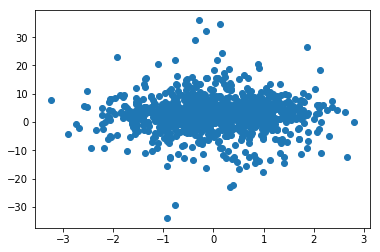

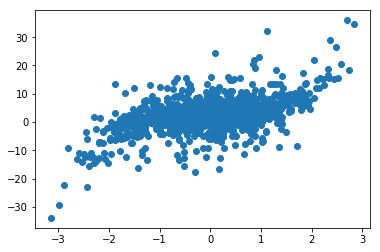

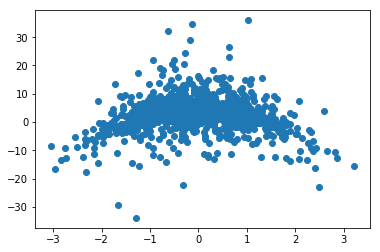

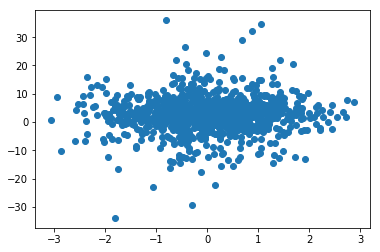

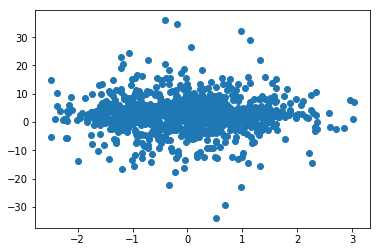

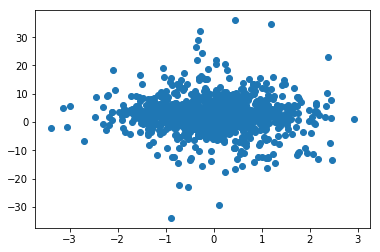

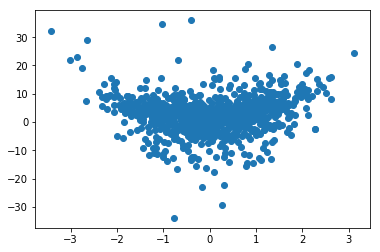

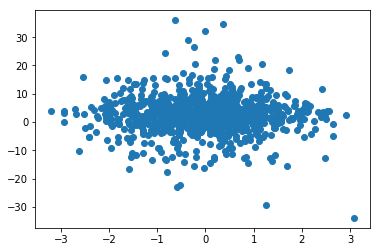

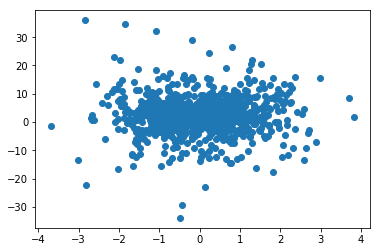

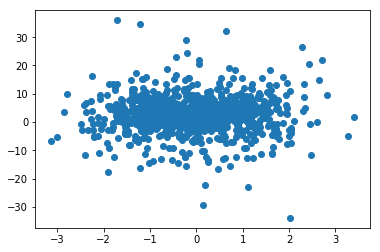

In [4]:
for i in range(x.shape[1]):
    plt.scatter(x[:,i], y)
    plt.show()

In [5]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
________________________________________________________________

In [6]:
NN_model.fit(x, y, epochs=500, batch_size=32, validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 0s 134us/sample - loss: 4.5526 - mean_absolute_error: 4.5526 - val_loss: 3.5810 - val_mean_absolute_error: 3.5810
Epoch 2/500
 32/800 [>.............................] - ETA: 0s - loss: 4.0761 - mean_absolute_error: 4.0761

2021-11-24 09:51:40.075662: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-11-24 09:51:40.097071: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3299990000 Hz
2021-11-24 09:51:40.097847: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x30b7b30 executing computations on platform Host. Devices:
2021-11-24 09:51:40.097904: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2021-11-24 09:51:40.125173: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or se

800/800 [==============================] - 0s 37us/sample - loss: 3.7291 - mean_absolute_error: 3.7291 - val_loss: 3.3074 - val_mean_absolute_error: 3.3074
Epoch 3/500
800/800 [==============================] - 0s 36us/sample - loss: 3.2389 - mean_absolute_error: 3.2389 - val_loss: 2.4783 - val_mean_absolute_error: 2.4783
Epoch 4/500
800/800 [==============================] - 0s 35us/sample - loss: 2.4184 - mean_absolute_error: 2.4184 - val_loss: 1.7264 - val_mean_absolute_error: 1.7264
Epoch 5/500
800/800 [==============================] - 0s 32us/sample - loss: 2.0343 - mean_absolute_error: 2.0343 - val_loss: 1.8642 - val_mean_absolute_error: 1.8642
Epoch 6/500
800/800 [==============================] - 0s 34us/sample - loss: 1.7384 - mean_absolute_error: 1.7384 - val_loss: 1.4996 - val_mean_absolute_error: 1.4996
Epoch 7/500
800/800 [==============================] - 0s 33us/sample - loss: 1.6386 - mean_absolute_error: 1.6386 - val_loss: 1.5076 - val_mean_absolute_error: 1.5076
Epoc

800/800 [==============================] - 0s 31us/sample - loss: 0.4361 - mean_absolute_error: 0.4361 - val_loss: 0.8604 - val_mean_absolute_error: 0.8604
Epoch 51/500
800/800 [==============================] - 0s 31us/sample - loss: 0.3933 - mean_absolute_error: 0.3933 - val_loss: 0.8014 - val_mean_absolute_error: 0.8014
Epoch 52/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3504 - mean_absolute_error: 0.3504 - val_loss: 0.7433 - val_mean_absolute_error: 0.7433
Epoch 53/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3515 - mean_absolute_error: 0.3515 - val_loss: 0.8373 - val_mean_absolute_error: 0.8373
Epoch 54/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3746 - mean_absolute_error: 0.3746 - val_loss: 0.8523 - val_mean_absolute_error: 0.8523
Epoch 55/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3755 - mean_absolute_error: 0.3755 - val_loss: 0.8636 - val_mean_absolute_error: 0.8636

800/800 [==============================] - 0s 31us/sample - loss: 0.3607 - mean_absolute_error: 0.3607 - val_loss: 0.8006 - val_mean_absolute_error: 0.8006
Epoch 99/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3447 - mean_absolute_error: 0.3447 - val_loss: 0.8173 - val_mean_absolute_error: 0.8173
Epoch 100/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3181 - mean_absolute_error: 0.3181 - val_loss: 0.7979 - val_mean_absolute_error: 0.7979
Epoch 101/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3447 - mean_absolute_error: 0.3447 - val_loss: 0.8745 - val_mean_absolute_error: 0.8745
Epoch 102/500
800/800 [==============================] - 0s 31us/sample - loss: 0.3690 - mean_absolute_error: 0.3690 - val_loss: 0.7969 - val_mean_absolute_error: 0.7969
Epoch 103/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3313 - mean_absolute_error: 0.3313 - val_loss: 0.7829 - val_mean_absolute_error: 0.

800/800 [==============================] - 0s 30us/sample - loss: 0.2681 - mean_absolute_error: 0.2681 - val_loss: 0.7753 - val_mean_absolute_error: 0.7753
Epoch 147/500
800/800 [==============================] - 0s 31us/sample - loss: 0.2501 - mean_absolute_error: 0.2501 - val_loss: 0.7869 - val_mean_absolute_error: 0.7869
Epoch 148/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3028 - mean_absolute_error: 0.3028 - val_loss: 0.8348 - val_mean_absolute_error: 0.8348
Epoch 149/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2670 - mean_absolute_error: 0.2670 - val_loss: 0.7991 - val_mean_absolute_error: 0.7991
Epoch 150/500
800/800 [==============================] - 0s 31us/sample - loss: 0.2745 - mean_absolute_error: 0.2745 - val_loss: 0.8105 - val_mean_absolute_error: 0.8105
Epoch 151/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2802 - mean_absolute_error: 0.2802 - val_loss: 0.8290 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 31us/sample - loss: 0.2567 - mean_absolute_error: 0.2567 - val_loss: 0.7699 - val_mean_absolute_error: 0.7699
Epoch 195/500
800/800 [==============================] - 0s 30us/sample - loss: 0.3156 - mean_absolute_error: 0.3156 - val_loss: 0.8098 - val_mean_absolute_error: 0.8098
Epoch 196/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2631 - mean_absolute_error: 0.2631 - val_loss: 0.7730 - val_mean_absolute_error: 0.7730
Epoch 197/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2272 - mean_absolute_error: 0.2272 - val_loss: 0.7719 - val_mean_absolute_error: 0.7719
Epoch 198/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2429 - mean_absolute_error: 0.2429 - val_loss: 0.7680 - val_mean_absolute_error: 0.7680
Epoch 199/500
800/800 [==============================] - 0s 29us/sample - loss: 0.2173 - mean_absolute_error: 0.2173 - val_loss: 0.7899 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 30us/sample - loss: 0.2575 - mean_absolute_error: 0.2575 - val_loss: 0.8149 - val_mean_absolute_error: 0.8149
Epoch 243/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2715 - mean_absolute_error: 0.2715 - val_loss: 0.8076 - val_mean_absolute_error: 0.8076
Epoch 244/500
800/800 [==============================] - 0s 31us/sample - loss: 0.2502 - mean_absolute_error: 0.2502 - val_loss: 0.7950 - val_mean_absolute_error: 0.7950
Epoch 245/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2252 - mean_absolute_error: 0.2252 - val_loss: 0.8167 - val_mean_absolute_error: 0.8167
Epoch 246/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2657 - mean_absolute_error: 0.2657 - val_loss: 0.8193 - val_mean_absolute_error: 0.8193
Epoch 247/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2390 - mean_absolute_error: 0.2390 - val_loss: 0.8183 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 30us/sample - loss: 0.2420 - mean_absolute_error: 0.2420 - val_loss: 0.8142 - val_mean_absolute_error: 0.8142
Epoch 291/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2473 - mean_absolute_error: 0.2473 - val_loss: 0.7677 - val_mean_absolute_error: 0.7677
Epoch 292/500
800/800 [==============================] - 0s 30us/sample - loss: 0.1761 - mean_absolute_error: 0.1761 - val_loss: 0.8058 - val_mean_absolute_error: 0.8058
Epoch 293/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2195 - mean_absolute_error: 0.2195 - val_loss: 0.7749 - val_mean_absolute_error: 0.7749
Epoch 294/500
800/800 [==============================] - 0s 31us/sample - loss: 0.2111 - mean_absolute_error: 0.2111 - val_loss: 0.7743 - val_mean_absolute_error: 0.7743
Epoch 295/500
800/800 [==============================] - 0s 30us/sample - loss: 0.1972 - mean_absolute_error: 0.1972 - val_loss: 0.7774 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 30us/sample - loss: 0.2037 - mean_absolute_error: 0.2037 - val_loss: 0.7944 - val_mean_absolute_error: 0.7944
Epoch 339/500
800/800 [==============================] - 0s 31us/sample - loss: 0.2072 - mean_absolute_error: 0.2072 - val_loss: 0.7921 - val_mean_absolute_error: 0.7921
Epoch 340/500
800/800 [==============================] - 0s 31us/sample - loss: 0.1956 - mean_absolute_error: 0.1956 - val_loss: 0.7691 - val_mean_absolute_error: 0.7691
Epoch 341/500
800/800 [==============================] - 0s 30us/sample - loss: 0.1846 - mean_absolute_error: 0.1846 - val_loss: 0.7755 - val_mean_absolute_error: 0.7755
Epoch 342/500
800/800 [==============================] - 0s 31us/sample - loss: 0.1876 - mean_absolute_error: 0.1876 - val_loss: 0.8066 - val_mean_absolute_error: 0.8066
Epoch 343/500
800/800 [==============================] - 0s 30us/sample - loss: 0.1958 - mean_absolute_error: 0.1958 - val_loss: 0.7840 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 29us/sample - loss: 0.2125 - mean_absolute_error: 0.2125 - val_loss: 0.7866 - val_mean_absolute_error: 0.7866
Epoch 387/500
800/800 [==============================] - 0s 29us/sample - loss: 0.2135 - mean_absolute_error: 0.2135 - val_loss: 0.8107 - val_mean_absolute_error: 0.8107
Epoch 388/500
800/800 [==============================] - 0s 29us/sample - loss: 0.2035 - mean_absolute_error: 0.2035 - val_loss: 0.8149 - val_mean_absolute_error: 0.8149
Epoch 389/500
800/800 [==============================] - 0s 29us/sample - loss: 0.1813 - mean_absolute_error: 0.1813 - val_loss: 0.8076 - val_mean_absolute_error: 0.8076
Epoch 390/500
800/800 [==============================] - 0s 29us/sample - loss: 0.1767 - mean_absolute_error: 0.1767 - val_loss: 0.8237 - val_mean_absolute_error: 0.8237
Epoch 391/500
800/800 [==============================] - 0s 30us/sample - loss: 0.2149 - mean_absolute_error: 0.2149 - val_loss: 0.8139 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 30us/sample - loss: 0.1738 - mean_absolute_error: 0.1738 - val_loss: 0.7938 - val_mean_absolute_error: 0.7938
Epoch 435/500
800/800 [==============================] - 0s 34us/sample - loss: 0.1595 - mean_absolute_error: 0.1595 - val_loss: 0.7769 - val_mean_absolute_error: 0.7769
Epoch 436/500
800/800 [==============================] - 0s 32us/sample - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.7979 - val_mean_absolute_error: 0.7979
Epoch 437/500
800/800 [==============================] - 0s 30us/sample - loss: 0.1710 - mean_absolute_error: 0.1710 - val_loss: 0.7880 - val_mean_absolute_error: 0.7880
Epoch 438/500
800/800 [==============================] - 0s 29us/sample - loss: 0.2072 - mean_absolute_error: 0.2072 - val_loss: 0.8319 - val_mean_absolute_error: 0.8319
Epoch 439/500
800/800 [==============================] - 0s 29us/sample - loss: 0.2117 - mean_absolute_error: 0.2117 - val_loss: 0.7987 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 40us/sample - loss: 0.1885 - mean_absolute_error: 0.1885 - val_loss: 0.7742 - val_mean_absolute_error: 0.7742
Epoch 483/500
800/800 [==============================] - 0s 33us/sample - loss: 0.1669 - mean_absolute_error: 0.1669 - val_loss: 0.7966 - val_mean_absolute_error: 0.7966
Epoch 484/500
800/800 [==============================] - 0s 30us/sample - loss: 0.1680 - mean_absolute_error: 0.1680 - val_loss: 0.7941 - val_mean_absolute_error: 0.7941
Epoch 485/500
800/800 [==============================] - 0s 29us/sample - loss: 0.1490 - mean_absolute_error: 0.1490 - val_loss: 0.7870 - val_mean_absolute_error: 0.7870
Epoch 486/500
800/800 [==============================] - 0s 30us/sample - loss: 0.1654 - mean_absolute_error: 0.1654 - val_loss: 0.8346 - val_mean_absolute_error: 0.8346
Epoch 487/500
800/800 [==============================] - 0s 29us/sample - loss: 0.1746 - mean_absolute_error: 0.1746 - val_loss: 0.8089 - val_mean_absolute_error: 0

In [7]:
yhat = NN_model.predict(xtest)
yhat = yhat.ravel() # else problem with dimensions

print(np.mean((yhat - ytest)**2.))

print(np.max(yhat), np.min(yhat))
print(np.max(ytest), np.min(ytest))

1.7708105244814476
27.082417 -21.28928
29.677756878253494 -28.165547618478225


## Self-Made SHAP Code

In [8]:
def ChooseK(P):# P is integer of Feature number
    K =np.random.beta(0.2, 0.2,1)
    K = int(P*K+1)
    if K==P+1: # some degenerate cases
        K = K-1
    return(K)

def SwapFeatures(X,i,m,j,k):
    # take instance x_i, exchange k of its features randomly with the features of x_m including the jth Feature
    output = X[i,:].copy()
    
    if k == 1: # only change jth Feature
        output[j] = X[m,j].copy()
    
    else:
        Selection = np.random.choice(np.arange(X.shape[1]), size=k, replace=False)
        while (np.sum(Selection==j) ==0): # Make sure that j is included in selection
            Selection = np.random.choice(np.arange(X.shape[1]), size=k, replace=False)
        
        output[Selection] = X[m,Selection].copy()
    
    return(output)

def Compare(x_j, x_noj, Model):
    return(Model.predict(x_j.reshape(1, -1)) - Model.predict(x_noj.reshape(1, -1)))

def CalcShap(X,i,j,M,Model):
    # Calculate Shap values for DataSet X for ith instance and jth feature with M iterations for AI-Model "Model"
    M_iter = 0 # iteration index
    SHAPValues = np.empty(M)
    
    while M_iter<M:
        m = np.random.randint(X.shape[0]) # random instance to "mix" x_i with
    
        if m!=i:
            k = ChooseK(X.shape[1])
            
            x_dummy_noj = SwapFeatures(X,i,m,j,k) # sample from random other instance
            x_dummy_j = x_dummy_noj.copy()
            x_dummy_j[j] = X[i,j].copy()  # compare with j and without j
        
            SHAPValues[M_iter] = Compare(x_dummy_j,x_dummy_noj, Model=Model)
        
            M_iter = M_iter+1
            
    return(np.mean(SHAPValues))

def FeatureImportance(X,j,M1,M2,Model):
    # Calculate Feature Importancec over M1 instances for j'th Feature of Data Set X,
    #   compare each instance M2 times and evaluate via Model
    
    Output = np.empty(M1)
    
    for m1 in range(M1):
        i = np.random.randint(X.shape[0])
        Output[m1] = np.abs(CalcShap(X,i,j,M2,Model))
        
    return(np.mean(Output))

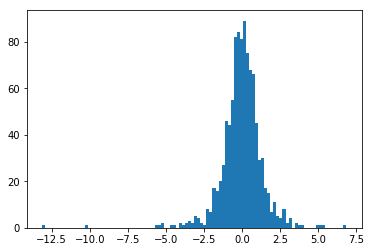

In [9]:
plt.hist((yhat - ytest), bins = 100)
plt.show()

In [10]:
start = time.time()
SHAP_Importance = np.empty(x.shape[1])
for Jf in range(x.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(x,Jf,1000,20,NN_model)
    print(Jf, SHAP_Importance[Jf])
end = time.time()
print(end-start)

0 0.12731720069907607
1 2.16280699073188
2 1.9006900366436692
3 0.11520345381684602
4 0.12192382079139352
5 0.12699913693778217
6 1.400712994395569
7 0.13832979170866314
8 1.16499233083874
9 1.2097360507741568
268.0198447704315


Indeed, only the true features have an importance > 1.

### Now SHAP-Self-Made with Interactions

In [11]:
def ChooseK2(P):# P is integer of Feature number
    K =np.random.beta(0.2, 0.2,1)
    K = 2 + (P-2)*K
    K = int(K)
    if K==P+1: # some degenerate cases
        K = K-1
    return(K)

2.0 20.0


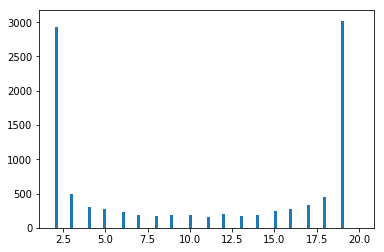

In [12]:
ks = np.empty(10000)
for i in range(10000):
    ks[i] = ChooseK2(20)
print(np.min(ks), np.max(ks))
plt.hist(ks,bins=100)
plt.show()




In [15]:
def ChooseK2(P):# P is integer of Feature number
    K =np.random.beta(0.2, 0.2,1)
    K = 2 + (P-2)*K
    K = int(K)
    if K==P+1: # some degenerate cases
        K = K-1
    return(K)

def SwapFeaturesInt(X,i,m,j1, j2,k):  
    # take instance x_i, exchange k of its features randomly with the features of x_m including the jth Feature
    output = X[i,:].copy()
    output[j1] = X[m,j1].copy()
    output[j2] = X[m,j2].copy()
    
    if k == 2: # only change j1 and j2th Feature
        output[j1] = X[m,j1].copy()
        output[j2] = X[m,j2].copy()

    if k>2:  # also exchange some other features
        Selection = np.random.choice(np.delete(np.arange(X.shape[1]),np.array([j1,j2])),
                                     size=k-2, replace=False)
        
        output[Selection] = X[m,Selection].copy()
    
    return(output)


def CalcShapInt(X,i,j1, j2,M,Model):  
    global x_dummy_j2
    # Calculate Shap values for DataSet X for ith instance and jth feature with M iterations for AI-Model "Model"
    M_iter = 0 # iteration index
    SHAPValues = np.zeros(M)
    
    while M_iter<M:
        m = np.random.randint(X.shape[0]) # random instance to "mix" x_i with
    
        if m!=i:
            k = ChooseK2(X.shape[1])
            
            
            
            x_dummy_noj12 = SwapFeaturesInt(X, i, m, j1, j2, k)      # make sure that the dummy-instance has j1
                                                                         #   and j2 exchanged
                                     # then we add first j1, then j2 and finally j1 and j2 
                
            x_dummy_j1 = x_dummy_noj12.copy()
            x_dummy_j1[j1] = X[i, j1].copy()
            
            x_dummy_j2 = x_dummy_noj12.copy()
            x_dummy_j2[j2] = X[i, j2].copy()
            
            
            x_dummy_j12 = x_dummy_j2.copy()
            x_dummy_j12[j1] = X[i,j1].copy() # this has the original j1 and j2 values
        
            
            SHAPValues[M_iter] += Model.predict(x_dummy_noj12.reshape(1,-1))
            SHAPValues[M_iter] -= Model.predict(x_dummy_j1.reshape(1,-1))
            SHAPValues[M_iter] -= Model.predict(x_dummy_j2.reshape(1,-1))
            SHAPValues[M_iter] += Model.predict(x_dummy_j12.reshape(1,-1))
            M_iter = M_iter+1            
            
    return(np.mean(SHAPValues))

def InteractionImportance(X,j1,j2,M1,M2,Model):
    # Calculate Interaction Importanc over M1 instances for j1 and j2'th Feature of Data Set X,
    #   compare each instance M2 times and evaluate via Model
    
    Output = np.empty(M1)
    
    for m1 in range(M1):
        i = np.random.randint(X.shape[0])
        Output[m1] = np.abs(CalcShapInt(X,i,j1, j2,M2,Model))
        
    return(np.mean(Output))

In [17]:
for i in range(9):
    print(i,InteractionImportance(x,i,9,100,10,NN_model))

0 0.10025093135237695
1 0.181844347551465
2 0.21014253044128417
3 0.11039239457249642
4 0.10629950918257235
5 0.11590425558388233
6 0.17061804053932428
7 0.11327214623987675
8 2.2622113476395604


In [18]:
for i in np.delete(range(9),2):
    print(i,InteractionImportance(x,i,2,100,10,NN_model))    

0 0.13179252769798042
1 0.22095537354052067
3 0.1116852760463953
4 0.09666754414886236
5 0.10563621131330728
6 0.13844492213428025
7 0.11443430219590665
8 0.22972730948030942


## DGLs

Hypothese: wenn wir 3 Neuronale Netze im Lorenzsystem von
(x_1, x_2, x_3) -> d/dt (x_1, x_2, x_3) machen,
sieht man mit SHAP die Interaktionen der nichtlinearen Terme

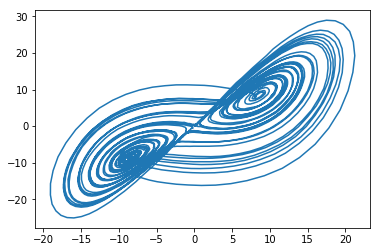

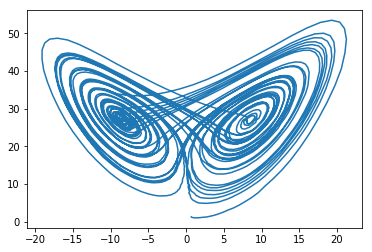

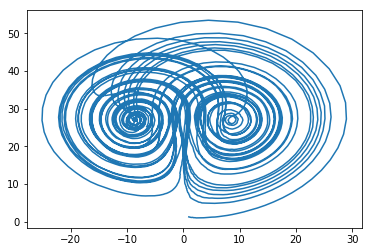

In [19]:
X = np.loadtxt("Lorenz5000_dt0.01.txt")

plt.plot(X[:,0], X[:,1])
plt.show()

plt.plot(X[:,0], X[:,2])
plt.show()

plt.plot(X[:,1], X[:,2])
plt.show()

In [20]:
print(X[0:(X.shape[0]-1),0])
print(X[1:,0])

[ 0.68740279  0.73084856  0.75877885 ... -6.88104749 -6.84861157
 -6.7888538 ]
[ 0.73084856  0.75877885  0.83716927 ... -6.84861157 -6.7888538
 -6.72797166]


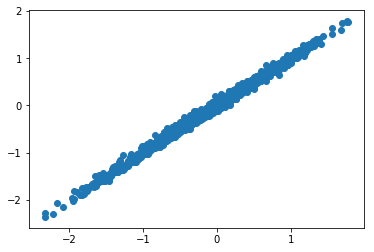

In [21]:
# Derivatives
dX0dt = np.gradient(X[:,0])
dX1dt = np.gradient(X[:,1])
dX2dt = np.gradient(X[:,2])


plt.scatter(dX0dt[1:],  X[1:,0] - X[0:(X.shape[0]-1),0])
plt.show() # looks good

### X0

In [22]:
NN0 = Sequential()

# The Input Layer :
NN0.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN0.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN0.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

In [23]:
X0_train, X0_test, y0_train, y0_test = sklearn.model_selection.train_test_split(X, dX0dt, test_size=0.33,
                                                                                random_state=42)

In [24]:
NN0.fit(X0_train, y0_train, epochs=500, batch_size=32, validation_split = 0.5)

Train on 1675 samples, validate on 1675 samples
Epoch 1/500
1675/1675 [==============================] - 0s 102us/sample - loss: 0.1103 - mean_absolute_error: 0.1103 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 2/500
1675/1675 [==============================] - 0s 49us/sample - loss: 0.0469 - mean_absolute_error: 0.0469 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 3/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0425 - mean_absolute_error: 0.0425 - val_loss: 0.0406 - val_mean_absolute_error: 0.0406
Epoch 4/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0277 - mean_absolute_error: 0.0277 - val_loss: 0.0390 - val_mean_absolute_error: 0.0390
Epoch 5/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0360 - mean_absolute_error: 0.0360 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310
Epoch 6/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0326 - mean_absolut

Epoch 49/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0266 - val_mean_absolute_error: 0.0266
Epoch 50/500
1675/1675 [==============================] - 0s 42us/sample - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0220 - val_mean_absolute_error: 0.0220
Epoch 51/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0248 - mean_absolute_error: 0.0248 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236
Epoch 52/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0250 - val_mean_absolute_error: 0.0250
Epoch 53/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0302 - mean_absolute_error: 0.0302 - val_loss: 0.0289 - val_mean_absolute_error: 0.0289
Epoch 54/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0295 - mean_absolute_error: 0.0295 - val_loss: 0.0299 - val_me

Epoch 97/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0233 - mean_absolute_error: 0.0233 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 98/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0251 - mean_absolute_error: 0.0251 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 99/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0232 - mean_absolute_error: 0.0232 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 100/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0233 - mean_absolute_error: 0.0233 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228
Epoch 101/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0221 - mean_absolute_error: 0.0221 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 102/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0219 - mean_absolute_error: 0.0219 - val_loss: 0.0233 - val

Epoch 145/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0232 - mean_absolute_error: 0.0232 - val_loss: 0.0223 - val_mean_absolute_error: 0.0223
Epoch 146/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0243 - mean_absolute_error: 0.0243 - val_loss: 0.0252 - val_mean_absolute_error: 0.0252
Epoch 147/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0215 - mean_absolute_error: 0.0215 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 148/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0225 - mean_absolute_error: 0.0225 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232
Epoch 149/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0214 - mean_absolute_error: 0.0214 - val_loss: 0.0219 - val_mean_absolute_error: 0.0219
Epoch 150/500
1675/1675 [==============================] - 0s 47us/sample - loss: 0.0212 - mean_absolute_error: 0.0212 - val_loss: 0.0258 - 

1675/1675 [==============================] - 0s 45us/sample - loss: 0.0210 - mean_absolute_error: 0.0210 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 193/500
1675/1675 [==============================] - 0s 47us/sample - loss: 0.0210 - mean_absolute_error: 0.0210 - val_loss: 0.0223 - val_mean_absolute_error: 0.0223
Epoch 194/500
1675/1675 [==============================] - 0s 46us/sample - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228
Epoch 195/500
1675/1675 [==============================] - 0s 47us/sample - loss: 0.0210 - mean_absolute_error: 0.0210 - val_loss: 0.0270 - val_mean_absolute_error: 0.0270
Epoch 196/500
1675/1675 [==============================] - 0s 48us/sample - loss: 0.0210 - mean_absolute_error: 0.0210 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269
Epoch 197/500
1675/1675 [==============================] - 0s 46us/sample - loss: 0.0218 - mean_absolute_error: 0.0218 - val_loss: 0.0224 - val_mean_absol

Epoch 240/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0219 - mean_absolute_error: 0.0219 - val_loss: 0.0219 - val_mean_absolute_error: 0.0219
Epoch 241/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0209 - mean_absolute_error: 0.0209 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 242/500
1675/1675 [==============================] - 0s 42us/sample - loss: 0.0208 - mean_absolute_error: 0.0208 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 243/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265
Epoch 244/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 245/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0206 - mean_absolute_error: 0.0206 - val_loss: 0.0208 - 

1675/1675 [==============================] - 0s 43us/sample - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0221 - val_mean_absolute_error: 0.0221
Epoch 288/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217
Epoch 289/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0210 - mean_absolute_error: 0.0210 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 290/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0198 - mean_absolute_error: 0.0198 - val_loss: 0.0230 - val_mean_absolute_error: 0.0230
Epoch 291/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0199 - mean_absolute_error: 0.0199 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260
Epoch 292/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0206 - mean_absolute_error: 0.0206 - val_loss: 0.0207 - val_mean_absol

Epoch 335/500
1675/1675 [==============================] - 0s 42us/sample - loss: 0.0205 - mean_absolute_error: 0.0205 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 336/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0224 - mean_absolute_error: 0.0224 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248
Epoch 337/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0209 - mean_absolute_error: 0.0209 - val_loss: 0.0238 - val_mean_absolute_error: 0.0238
Epoch 338/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0252 - val_mean_absolute_error: 0.0252
Epoch 339/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0206 - mean_absolute_error: 0.0206 - val_loss: 0.0209 - val_mean_absolute_error: 0.0209
Epoch 340/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0204 - mean_absolute_error: 0.0204 - val_loss: 0.0206 - 

1675/1675 [==============================] - 0s 43us/sample - loss: 0.0190 - mean_absolute_error: 0.0190 - val_loss: 0.0244 - val_mean_absolute_error: 0.0244
Epoch 383/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0198 - mean_absolute_error: 0.0198 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240
Epoch 384/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0195 - mean_absolute_error: 0.0195 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 385/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0186 - mean_absolute_error: 0.0186 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 386/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0196 - mean_absolute_error: 0.0196 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 387/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0217 - mean_absolute_error: 0.0217 - val_loss: 0.0222 - val_mean_absol

Epoch 430/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0198 - mean_absolute_error: 0.0198 - val_loss: 0.0219 - val_mean_absolute_error: 0.0219
Epoch 431/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0204 - mean_absolute_error: 0.0204 - val_loss: 0.0252 - val_mean_absolute_error: 0.0252
Epoch 432/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0209 - mean_absolute_error: 0.0209 - val_loss: 0.0212 - val_mean_absolute_error: 0.0212
Epoch 433/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0199 - mean_absolute_error: 0.0199 - val_loss: 0.0222 - val_mean_absolute_error: 0.0222
Epoch 434/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0188 - mean_absolute_error: 0.0188 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217
Epoch 435/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0195 - mean_absolute_error: 0.0195 - val_loss: 0.0211 - 

1675/1675 [==============================] - 0s 44us/sample - loss: 0.0195 - mean_absolute_error: 0.0195 - val_loss: 0.0242 - val_mean_absolute_error: 0.0242
Epoch 478/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0199 - mean_absolute_error: 0.0199 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 479/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0208 - mean_absolute_error: 0.0208 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216
Epoch 480/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0185 - mean_absolute_error: 0.0185 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 481/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0193 - mean_absolute_error: 0.0193 - val_loss: 0.0215 - val_mean_absolute_error: 0.0215
Epoch 482/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0195 - mean_absolute_error: 0.0195 - val_loss: 0.0207 - val_mean_absol

In [25]:
y0hat = NN0.predict(X0_test)
y0hat = y0hat.ravel() # else problem with dimensions

print(np.mean((y0hat - y0_test)**2.))

0.0008156781886045031


### X1

In [26]:
NN1 = Sequential()

# The Input Layer :
NN1.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN1.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN1.summary()

X1_train, X1_test, y1_train, y1_test = sklearn.model_selection.train_test_split(X, dX1dt, test_size=0.33,
                                                                                random_state=42)

NN1.fit(X1_train, y1_train, epochs=500, batch_size=32, validation_split = 0.5)
y1hat = NN1.predict(X1_test)
y1hat = y1hat.ravel() # else problem with dimensions


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

Epoch 42/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0458 - mean_absolute_error: 0.0458 - val_loss: 0.0442 - val_mean_absolute_error: 0.0442
Epoch 43/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0536 - mean_absolute_error: 0.0536 - val_loss: 0.0636 - val_mean_absolute_error: 0.0636
Epoch 44/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0567 - mean_absolute_error: 0.0567 - val_loss: 0.0568 - val_mean_absolute_error: 0.0568
Epoch 45/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0567 - mean_absolute_error: 0.0567 - val_loss: 0.0551 - val_mean_absolute_error: 0.0551
Epoch 46/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0502 - mean_absolute_error: 0.0502 - val_loss: 0.0734 - val_mean_absolute_error: 0.0734
Epoch 47/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0536 - mean_absolute_error: 0.0536 - val_loss: 0.0501 - val_me

Epoch 90/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0350 - val_mean_absolute_error: 0.0350
Epoch 91/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0385 - val_mean_absolute_error: 0.0385
Epoch 92/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0457 - mean_absolute_error: 0.0457 - val_loss: 0.0470 - val_mean_absolute_error: 0.0470
Epoch 93/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0511 - mean_absolute_error: 0.0511 - val_loss: 0.0393 - val_mean_absolute_error: 0.0393
Epoch 94/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0360 - mean_absolute_error: 0.0360 - val_loss: 0.0340 - val_mean_absolute_error: 0.0340
Epoch 95/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0391 - mean_absolute_error: 0.0391 - val_loss: 0.0480 - val_me

Epoch 138/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0385 - mean_absolute_error: 0.0385 - val_loss: 0.0492 - val_mean_absolute_error: 0.0492
Epoch 139/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0354 - mean_absolute_error: 0.0354 - val_loss: 0.0511 - val_mean_absolute_error: 0.0511
Epoch 140/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367
Epoch 141/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0302 - mean_absolute_error: 0.0302 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275
Epoch 142/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0302 - mean_absolute_error: 0.0302 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 143/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0347 - mean_absolute_error: 0.0347 - val_loss: 0.0272 - 

1675/1675 [==============================] - 0s 43us/sample - loss: 0.0324 - mean_absolute_error: 0.0324 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320
Epoch 186/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0345 - mean_absolute_error: 0.0345 - val_loss: 0.0369 - val_mean_absolute_error: 0.0369
Epoch 187/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0351 - mean_absolute_error: 0.0351 - val_loss: 0.0481 - val_mean_absolute_error: 0.0481
Epoch 188/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0310 - mean_absolute_error: 0.0310 - val_loss: 0.0298 - val_mean_absolute_error: 0.0298
Epoch 189/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0296 - mean_absolute_error: 0.0296 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 190/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0337 - mean_absolute_error: 0.0337 - val_loss: 0.0300 - val_mean_absol

Epoch 233/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0281 - mean_absolute_error: 0.0281 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 234/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0319 - mean_absolute_error: 0.0319 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425
Epoch 235/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0291 - mean_absolute_error: 0.0291 - val_loss: 0.0374 - val_mean_absolute_error: 0.0374
Epoch 236/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0271 - mean_absolute_error: 0.0271 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 237/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0299 - mean_absolute_error: 0.0299 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 238/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0370 - mean_absolute_error: 0.0370 - val_loss: 0.0428 - 

1675/1675 [==============================] - 0s 44us/sample - loss: 0.0256 - mean_absolute_error: 0.0256 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258
Epoch 281/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0252 - mean_absolute_error: 0.0252 - val_loss: 0.0271 - val_mean_absolute_error: 0.0271
Epoch 282/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0305 - mean_absolute_error: 0.0305 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267
Epoch 283/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0298 - mean_absolute_error: 0.0298 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425
Epoch 284/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0305 - mean_absolute_error: 0.0305 - val_loss: 0.0346 - val_mean_absolute_error: 0.0346
Epoch 285/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0261 - mean_absolute_error: 0.0261 - val_loss: 0.0251 - val_mean_absol

Epoch 328/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0262 - mean_absolute_error: 0.0262 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305
Epoch 329/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0303 - mean_absolute_error: 0.0303 - val_loss: 0.0298 - val_mean_absolute_error: 0.0298
Epoch 330/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0298 - mean_absolute_error: 0.0298 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 331/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0274 - mean_absolute_error: 0.0274 - val_loss: 0.0339 - val_mean_absolute_error: 0.0339
Epoch 332/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0238 - mean_absolute_error: 0.0238 - val_loss: 0.0280 - val_mean_absolute_error: 0.0280
Epoch 333/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0282 - mean_absolute_error: 0.0282 - val_loss: 0.0297 - 

1675/1675 [==============================] - 0s 43us/sample - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337
Epoch 376/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0318 - mean_absolute_error: 0.0318 - val_loss: 0.0383 - val_mean_absolute_error: 0.0383
Epoch 377/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0270 - mean_absolute_error: 0.0270 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334
Epoch 378/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0282 - mean_absolute_error: 0.0282 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300
Epoch 379/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281
Epoch 380/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0337 - val_mean_absol

Epoch 423/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295
Epoch 424/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0393 - val_mean_absolute_error: 0.0393
Epoch 425/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0279 - mean_absolute_error: 0.0279 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331
Epoch 426/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235
Epoch 427/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269
Epoch 428/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0245 - 

1675/1675 [==============================] - 0s 43us/sample - loss: 0.0229 - mean_absolute_error: 0.0229 - val_loss: 0.0343 - val_mean_absolute_error: 0.0343
Epoch 471/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240
Epoch 472/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0232 - mean_absolute_error: 0.0232 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321
Epoch 473/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0248 - mean_absolute_error: 0.0248 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305
Epoch 474/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0265 - mean_absolute_error: 0.0265 - val_loss: 0.0249 - val_mean_absolute_error: 0.0249
Epoch 475/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0215 - mean_absolute_error: 0.0215 - val_loss: 0.0329 - val_mean_absol

In [27]:
print(np.mean((y1hat - y1_test)**2.))

0.0010856224571508383


## X2

In [28]:
NN2 = Sequential()

# The Input Layer :
NN2.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN2.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN2.summary()

X2_train, X2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X, dX2dt, test_size=0.33,
                                                                                random_state=42)

NN2.fit(X2_train, y2_train, epochs=500, batch_size=32, validation_split = 0.5)
y2hat = NN2.predict(X1_test)
y2hat = y2hat.ravel() # else problem with dimensions


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

Epoch 42/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0329 - mean_absolute_error: 0.0329 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335
Epoch 43/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0570 - val_mean_absolute_error: 0.0570
Epoch 44/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0566 - val_mean_absolute_error: 0.0566
Epoch 45/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0388 - mean_absolute_error: 0.0388 - val_loss: 0.0459 - val_mean_absolute_error: 0.0459
Epoch 46/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0566 - val_mean_absolute_error: 0.0566
Epoch 47/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0470 - val_me

Epoch 90/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0372 - mean_absolute_error: 0.0372 - val_loss: 0.0360 - val_mean_absolute_error: 0.0360
Epoch 91/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0436 - mean_absolute_error: 0.0436 - val_loss: 0.0417 - val_mean_absolute_error: 0.0417
Epoch 92/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0286 - mean_absolute_error: 0.0286 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278
Epoch 93/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0327 - mean_absolute_error: 0.0327 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273
Epoch 94/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0331 - mean_absolute_error: 0.0331 - val_loss: 0.0839 - val_mean_absolute_error: 0.0839
Epoch 95/500
1675/1675 [==============================] - 0s 46us/sample - loss: 0.0429 - mean_absolute_error: 0.0429 - val_loss: 0.0394 - val_me

Epoch 138/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439
Epoch 139/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0334 - mean_absolute_error: 0.0334 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284
Epoch 140/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0297 - mean_absolute_error: 0.0297 - val_loss: 0.0266 - val_mean_absolute_error: 0.0266
Epoch 141/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0272 - mean_absolute_error: 0.0272 - val_loss: 0.0365 - val_mean_absolute_error: 0.0365
Epoch 142/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0285 - mean_absolute_error: 0.0285 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274
Epoch 143/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0270 - mean_absolute_error: 0.0270 - val_loss: 0.0356 - 

1675/1675 [==============================] - 0s 44us/sample - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 186/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0261 - mean_absolute_error: 0.0261 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216
Epoch 187/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0251 - mean_absolute_error: 0.0251 - val_loss: 0.0384 - val_mean_absolute_error: 0.0384
Epoch 188/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0225 - val_mean_absolute_error: 0.0225
Epoch 189/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0291 - mean_absolute_error: 0.0291 - val_loss: 0.0379 - val_mean_absolute_error: 0.0379
Epoch 190/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0342 - mean_absolute_error: 0.0342 - val_loss: 0.0265 - val_mean_absol

Epoch 233/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0293 - mean_absolute_error: 0.0293 - val_loss: 0.0279 - val_mean_absolute_error: 0.0279
Epoch 234/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0251 - mean_absolute_error: 0.0251 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 235/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0272 - mean_absolute_error: 0.0272 - val_loss: 0.0431 - val_mean_absolute_error: 0.0431
Epoch 236/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0332 - mean_absolute_error: 0.0332 - val_loss: 0.0362 - val_mean_absolute_error: 0.0362
Epoch 237/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0299 - mean_absolute_error: 0.0299 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240
Epoch 238/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0257 - mean_absolute_error: 0.0257 - val_loss: 0.0379 - 

1675/1675 [==============================] - 0s 45us/sample - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0208 - val_mean_absolute_error: 0.0208
Epoch 281/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0231 - mean_absolute_error: 0.0231 - val_loss: 0.0241 - val_mean_absolute_error: 0.0241
Epoch 282/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327
Epoch 283/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0327 - mean_absolute_error: 0.0327 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233
Epoch 284/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0232 - mean_absolute_error: 0.0232 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272
Epoch 285/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0243 - mean_absolute_error: 0.0243 - val_loss: 0.0292 - val_mean_absol

Epoch 328/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0223 - mean_absolute_error: 0.0223 - val_loss: 0.0234 - val_mean_absolute_error: 0.0234
Epoch 329/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0259 - mean_absolute_error: 0.0259 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 330/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0248 - mean_absolute_error: 0.0248 - val_loss: 0.0251 - val_mean_absolute_error: 0.0251
Epoch 331/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269
Epoch 332/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0239 - mean_absolute_error: 0.0239 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232
Epoch 333/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0228 - mean_absolute_error: 0.0228 - val_loss: 0.0299 - 

1675/1675 [==============================] - 0s 45us/sample - loss: 0.0258 - mean_absolute_error: 0.0258 - val_loss: 0.0342 - val_mean_absolute_error: 0.0342
Epoch 376/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0251 - mean_absolute_error: 0.0251 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240
Epoch 377/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307
Epoch 378/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0249 - val_mean_absolute_error: 0.0249
Epoch 379/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0238 - mean_absolute_error: 0.0238 - val_loss: 0.0225 - val_mean_absolute_error: 0.0225
Epoch 380/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0234 - val_mean_absol

Epoch 423/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0266 - mean_absolute_error: 0.0266 - val_loss: 0.0286 - val_mean_absolute_error: 0.0286
Epoch 424/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0230 - mean_absolute_error: 0.0230 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288
Epoch 425/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 426/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0210 - mean_absolute_error: 0.0210 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236
Epoch 427/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0231 - mean_absolute_error: 0.0231 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310
Epoch 428/500
1675/1675 [==============================] - 0s 45us/sample - loss: 0.0219 - mean_absolute_error: 0.0219 - val_loss: 0.0391 - 

1675/1675 [==============================] - 0s 45us/sample - loss: 0.0248 - mean_absolute_error: 0.0248 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 471/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0209 - mean_absolute_error: 0.0209 - val_loss: 0.0252 - val_mean_absolute_error: 0.0252
Epoch 472/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0226 - mean_absolute_error: 0.0226 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337
Epoch 473/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0232 - mean_absolute_error: 0.0232 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233
Epoch 474/500
1675/1675 [==============================] - 0s 44us/sample - loss: 0.0214 - mean_absolute_error: 0.0214 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274
Epoch 475/500
1675/1675 [==============================] - 0s 43us/sample - loss: 0.0231 - mean_absolute_error: 0.0231 - val_loss: 0.0294 - val_mean_absol

In [29]:
print(np.mean((y1hat - y1_test)**2.))

0.0010856224571508383


## Evaluate Goodness-of-Fit

In [30]:
dt = 0.01
X0hat = np.zeros(X.shape[0])
X0hat[0] = X[0,0]
X1hat = np.zeros(X.shape[0])
X1hat[0] = X[0,1]
dx0 = NN0.predict(X)
dx1 = NN1.predict(X)

for i in range(len(X0hat)-1):
    X0hat[i+1] = X0hat[i] + dt*dx0[i] 
    X1hat[i+1] = X1hat[i] + dt*dx1[i] 
    

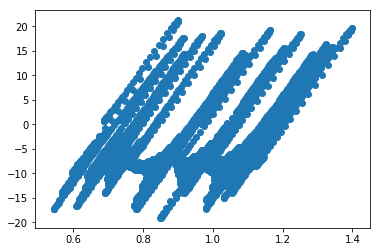

In [31]:
plt.scatter(X0hat, X[:,0])
plt.show()

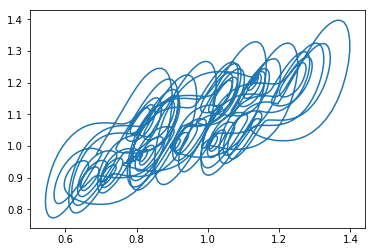

In [32]:
# probably not useful for forward-integration
plt.plot(X0hat, X1hat)
plt.show()

# Question: when exactly does the trajectory "jump"?

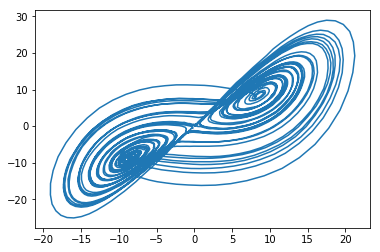

In [84]:
# Now with the explicit past measurement
dt = 0.01
X0hat = np.zeros(X.shape[0])
X0hat[0] = X[0,0]
X1hat = np.zeros(X.shape[0])
X1hat[0] = X[0,1]
dx0 = NN0.predict(X)
dx1 = NN1.predict(X)

for i in range(len(X0hat)-1):
    X0hat[i+1] = X[i,0] + dt*dx0[i] 
    X1hat[i+1] = X[i,1] + dt*dx1[i] 
    

plt.plot(X0hat, X1hat)
plt.show()

# Much better!

## Self-made SHAP code

In [33]:
# For the entire Data Set and 0th component
start = time.time()
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NN0)
    print(Jf, SHAP_Importance[Jf])
end = time.time()
print(end-start)

0 0.6760018887085839
1 0.7639495203401427
2 0.023033141227345916
88.05598211288452


Correctly shows that the Lorenz-Systems dx0/dt only depends on x0 and x1 :)

In [34]:
# For the entire Data Set and 1st component
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NN1)
    print(Jf, SHAP_Importance[Jf])

0 0.4218336307744263
1 0.3244024173108396
2 0.14313972932421604


For dx1/dt, the pseudo-SHAP correctly shows that all features contribute in the same order of magnitude.

In [35]:
# For the entire Data Set and 2nd component
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NN2)
    print(Jf, SHAP_Importance[Jf])

0 0.38516338569354264
1 0.2898960749376565
2 0.1562192369857803


Again, all features are in the same order of magnitude as it should be

## And Self-made SHAP Interactions

In [36]:
# NN0
print(InteractionImportance(X,0,1,100,50,NN0)) 
print(InteractionImportance(X,0,2,100,50,NN0)) 
print(InteractionImportance(X,1,2,100,50,NN0)) 

0.04159266816973686
0.0515997078076005
0.018997954248078167


In [37]:
# NN1:
print(InteractionImportance(X,0,1,100,50,NN1)) 
print(InteractionImportance(X,0,2,100,50,NN1)) 
print(InteractionImportance(X,1,2,100,50,NN1))

0.18143942785840486
0.2340438932243735
0.07536216633282602


In [38]:
# NN2:
print(InteractionImportance(X,0,1,100,50,NN2)) 
print(InteractionImportance(X,0,2,100,50,NN2)) 
print(InteractionImportance(X,1,2,100,50,NN2)) 

1.502413740292936
0.04266635545492172
0.037362618563324214


At least it seems to accurately identify the x_0*x_1 interaction for dx_2/dt. However, for dx_1/dt, it does not manage to identify the x_0*x_2 interaction compared to the interpretation of the (nonexistent) x_0*x_1 interaction, but at least gives it a clearly nonzero effect. It correctly does not assign any meaningful interaction to the dx_0/dt components. The 

## Now try to predict the x_t+1 instead of the rhs dx/dt

In [39]:
Xt0 = X[0:(X.shape[0]-1):]
Xt1 = X[1:,:]

In [40]:
# Predict X0[t+1]

NNt0 = Sequential()

# The Input Layer :
NNt0.add(Dense(128, kernel_initializer='normal',input_dim = Xt0.shape[1], activation='relu'))

# The Hidden Layers :
NNt0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NNt0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NNt0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NNt0.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NNt0.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NNt0.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NNt0.summary()

Xt_train, Xt_test, yt0_train, yt0_test = sklearn.model_selection.train_test_split(Xt0, Xt1[:,0], test_size=0.33,
                                                                                random_state=42)

NNt0.fit(Xt_train, yt0_train, epochs=500, batch_size=32, validation_split = 0.5)



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

Epoch 42/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.1615 - mean_absolute_error: 0.1615 - val_loss: 0.1048 - val_mean_absolute_error: 0.1048
Epoch 43/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1326 - mean_absolute_error: 0.1326 - val_loss: 0.2227 - val_mean_absolute_error: 0.2227
Epoch 44/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1177 - mean_absolute_error: 0.1177 - val_loss: 0.1206 - val_mean_absolute_error: 0.1206
Epoch 45/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1369 - mean_absolute_error: 0.1369 - val_loss: 0.1233 - val_mean_absolute_error: 0.1233
Epoch 46/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.1765 - mean_absolute_error: 0.1765 - val_loss: 0.2044 - val_mean_absolute_error: 0.2044
Epoch 47/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1650 - mean_absolute_error: 0.1650 - val_loss: 0.2278 - val_me

Epoch 90/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0913 - mean_absolute_error: 0.0913 - val_loss: 0.0692 - val_mean_absolute_error: 0.0692
Epoch 91/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0719 - mean_absolute_error: 0.0719 - val_loss: 0.1072 - val_mean_absolute_error: 0.1072
Epoch 92/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1099 - mean_absolute_error: 0.1099 - val_loss: 0.1790 - val_mean_absolute_error: 0.1790
Epoch 93/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1173 - mean_absolute_error: 0.1173 - val_loss: 0.0593 - val_mean_absolute_error: 0.0593
Epoch 94/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.1943 - mean_absolute_error: 0.1943 - val_loss: 0.1906 - val_mean_absolute_error: 0.1906
Epoch 95/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1583 - mean_absolute_error: 0.1583 - val_loss: 0.1521 - val_me

Epoch 138/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0787 - mean_absolute_error: 0.0787 - val_loss: 0.0488 - val_mean_absolute_error: 0.0488
Epoch 139/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0797 - mean_absolute_error: 0.0797 - val_loss: 0.0578 - val_mean_absolute_error: 0.0578
Epoch 140/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1365 - mean_absolute_error: 0.1365 - val_loss: 0.0952 - val_mean_absolute_error: 0.0952
Epoch 141/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.1025 - mean_absolute_error: 0.1025 - val_loss: 0.1039 - val_mean_absolute_error: 0.1039
Epoch 142/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0907 - mean_absolute_error: 0.0907 - val_loss: 0.0818 - val_mean_absolute_error: 0.0818
Epoch 143/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1434 - mean_absolute_error: 0.1434 - val_loss: 0.1750 - 

1674/1674 [==============================] - 0s 45us/sample - loss: 0.1003 - mean_absolute_error: 0.1003 - val_loss: 0.1548 - val_mean_absolute_error: 0.1548
Epoch 186/500
1674/1674 [==============================] - 0s 46us/sample - loss: 0.0941 - mean_absolute_error: 0.0941 - val_loss: 0.0614 - val_mean_absolute_error: 0.0614
Epoch 187/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0907 - mean_absolute_error: 0.0907 - val_loss: 0.1167 - val_mean_absolute_error: 0.1167
Epoch 188/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0790 - mean_absolute_error: 0.0790 - val_loss: 0.0470 - val_mean_absolute_error: 0.0470
Epoch 189/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0710 - mean_absolute_error: 0.0710 - val_loss: 0.1124 - val_mean_absolute_error: 0.1124
Epoch 190/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.1792 - mean_absolute_error: 0.1792 - val_loss: 0.1381 - val_mean_absol

Epoch 233/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.1101 - mean_absolute_error: 0.1101 - val_loss: 0.1067 - val_mean_absolute_error: 0.1067
Epoch 234/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0787 - mean_absolute_error: 0.0787 - val_loss: 0.0522 - val_mean_absolute_error: 0.0522
Epoch 235/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0820 - mean_absolute_error: 0.0820 - val_loss: 0.0419 - val_mean_absolute_error: 0.0419
Epoch 236/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0730 - mean_absolute_error: 0.0730 - val_loss: 0.0408 - val_mean_absolute_error: 0.0408
Epoch 237/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0707 - mean_absolute_error: 0.0707 - val_loss: 0.0504 - val_mean_absolute_error: 0.0504
Epoch 238/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0684 - mean_absolute_error: 0.0684 - val_loss: 0.1154 - 

1674/1674 [==============================] - 0s 44us/sample - loss: 0.1044 - mean_absolute_error: 0.1044 - val_loss: 0.1059 - val_mean_absolute_error: 0.1059
Epoch 281/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0803 - mean_absolute_error: 0.0803 - val_loss: 0.0471 - val_mean_absolute_error: 0.0471
Epoch 282/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0980 - mean_absolute_error: 0.0980 - val_loss: 0.1292 - val_mean_absolute_error: 0.1292
Epoch 283/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0860 - mean_absolute_error: 0.0860 - val_loss: 0.0818 - val_mean_absolute_error: 0.0818
Epoch 284/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0619 - mean_absolute_error: 0.0619 - val_loss: 0.0729 - val_mean_absolute_error: 0.0729
Epoch 285/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0731 - mean_absolute_error: 0.0731 - val_loss: 0.0909 - val_mean_absol

Epoch 328/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.1178 - mean_absolute_error: 0.1178 - val_loss: 0.0770 - val_mean_absolute_error: 0.0770
Epoch 329/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0951 - mean_absolute_error: 0.0951 - val_loss: 0.0724 - val_mean_absolute_error: 0.0724
Epoch 330/500
1674/1674 [==============================] - 0s 46us/sample - loss: 0.0477 - mean_absolute_error: 0.0477 - val_loss: 0.1045 - val_mean_absolute_error: 0.1045
Epoch 331/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0877 - mean_absolute_error: 0.0877 - val_loss: 0.0460 - val_mean_absolute_error: 0.0460
Epoch 332/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0637 - mean_absolute_error: 0.0637 - val_loss: 0.0686 - val_mean_absolute_error: 0.0686
Epoch 333/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0779 - mean_absolute_error: 0.0779 - val_loss: 0.0740 - 

1674/1674 [==============================] - 0s 46us/sample - loss: 0.0643 - mean_absolute_error: 0.0643 - val_loss: 0.1022 - val_mean_absolute_error: 0.1022
Epoch 376/500
1674/1674 [==============================] - 0s 46us/sample - loss: 0.0964 - mean_absolute_error: 0.0964 - val_loss: 0.1177 - val_mean_absolute_error: 0.1177
Epoch 377/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0694 - mean_absolute_error: 0.0694 - val_loss: 0.0680 - val_mean_absolute_error: 0.0680
Epoch 378/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0663 - mean_absolute_error: 0.0663 - val_loss: 0.0449 - val_mean_absolute_error: 0.0449
Epoch 379/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.1217 - mean_absolute_error: 0.1217 - val_loss: 0.0522 - val_mean_absolute_error: 0.0522
Epoch 380/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0689 - mean_absolute_error: 0.0689 - val_loss: 0.0298 - val_mean_absol

Epoch 423/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0471 - mean_absolute_error: 0.0471 - val_loss: 0.0710 - val_mean_absolute_error: 0.0710
Epoch 424/500
1674/1674 [==============================] - 0s 47us/sample - loss: 0.0717 - mean_absolute_error: 0.0717 - val_loss: 0.1456 - val_mean_absolute_error: 0.1456
Epoch 425/500
1674/1674 [==============================] - 0s 47us/sample - loss: 0.0923 - mean_absolute_error: 0.0923 - val_loss: 0.1083 - val_mean_absolute_error: 0.1083
Epoch 426/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0699 - mean_absolute_error: 0.0699 - val_loss: 0.0461 - val_mean_absolute_error: 0.0461
Epoch 427/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0742 - mean_absolute_error: 0.0742 - val_loss: 0.0418 - val_mean_absolute_error: 0.0418
Epoch 428/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0591 - mean_absolute_error: 0.0591 - val_loss: 0.0728 - 

1674/1674 [==============================] - 0s 44us/sample - loss: 0.0803 - mean_absolute_error: 0.0803 - val_loss: 0.1531 - val_mean_absolute_error: 0.1531
Epoch 471/500
1674/1674 [==============================] - 0s 44us/sample - loss: 0.0646 - mean_absolute_error: 0.0646 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 472/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0702 - mean_absolute_error: 0.0702 - val_loss: 0.0571 - val_mean_absolute_error: 0.0571
Epoch 473/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0727 - mean_absolute_error: 0.0727 - val_loss: 0.0721 - val_mean_absolute_error: 0.0721
Epoch 474/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0656 - mean_absolute_error: 0.0656 - val_loss: 0.0649 - val_mean_absolute_error: 0.0649
Epoch 475/500
1674/1674 [==============================] - 0s 45us/sample - loss: 0.0602 - mean_absolute_error: 0.0602 - val_loss: 0.0906 - val_mean_absol

In [41]:
yt0hat = NNt0.predict(Xt_test)
yt0hat = yt0hat.ravel() # else problem with dimensions
print(np.mean((yt0hat - yt0_test)**2.))

0.03133705334594841


In [42]:
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NNt0)
    print(Jf, SHAP_Importance[Jf])

0 6.5373111964404576
1 0.9597723556440324
2 0.062412489221990115


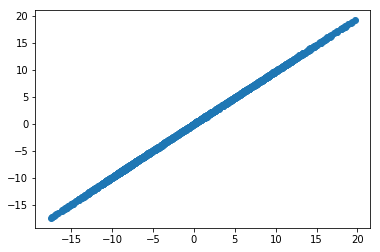

In [43]:
plt.scatter(yt0hat, yt0_test)
plt.show()

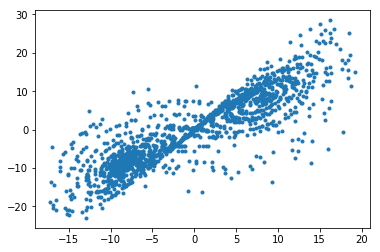

In [87]:
plt.scatter(Xt_test[:,0], Xt_test[:,1], marker =".")
plt.show()

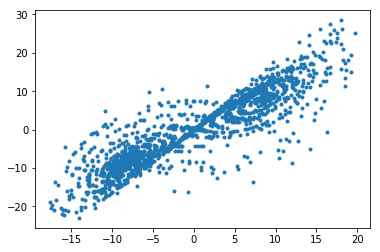

In [88]:
plt.scatter(yt0hat, Xt_test[:,1], marker =".")
plt.show()

Rather good fit. SHAP tells us: the prediction is dominated by the previous value (which makes sense because x0[t+1] ~ x0[t]).

### Time Dependence
Let's see if SHAP values change over time.

#### X0 with NN0

In [97]:
SHAP_Temporal0 = np.empty(X.shape)
M = 10 # iterations per instance

for i in range(X.shape[0]):
    SHAP_Temporal0[i,0] = CalcShap(X,i,0,M,NN0)
    SHAP_Temporal0[i,1] = CalcShap(X,i,1,M,NN0)
    SHAP_Temporal0[i,2] = CalcShap(X,i,2,M,NN0)
print(np.corrcoef(np.transpose(SHAP_Temporal0)))

[[ 1.         -0.79410418  0.52728873]
 [-0.79410418  1.         -0.32521565]
 [ 0.52728873 -0.32521565  1.        ]]


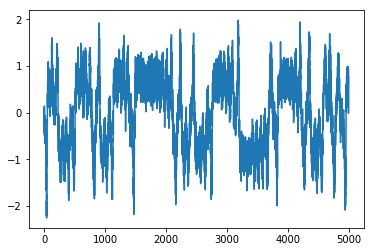

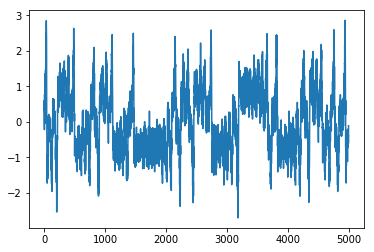

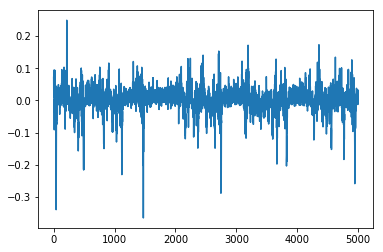

In [98]:
for i in range(X.shape[1]):
    plt.plot(np.arange(X.shape[0]), SHAP_Temporal0[:,i])
    plt.show()

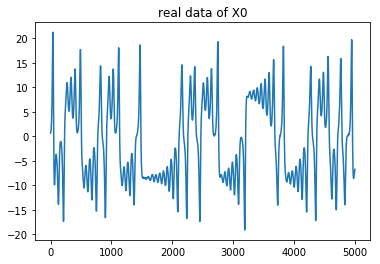

In [99]:
plt.plot(np.arange(X.shape[0]), X[:,0])
plt.title("real data of X0")
plt.show()

#### X1 with NN1

[[ 1.         -0.56517751  0.36620612]
 [-0.56517751  1.         -0.02044868]
 [ 0.36620612 -0.02044868  1.        ]]


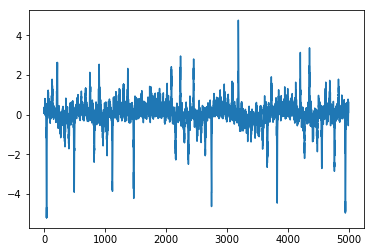

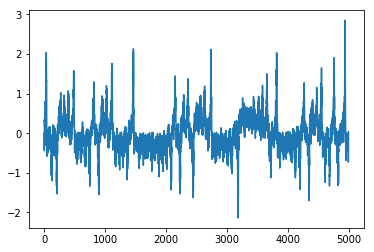

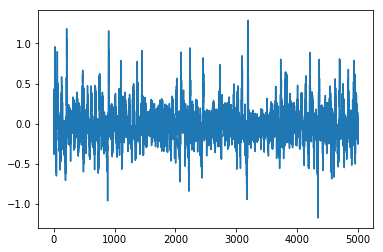

In [100]:
SHAP_Temporal1 = np.empty(X.shape)
M = 10 # iterations per instance

for i in range(X.shape[0]):
    SHAP_Temporal1[i,0] = CalcShap(X,i,0,M,NN1)
    SHAP_Temporal1[i,1] = CalcShap(X,i,1,M,NN1)
    SHAP_Temporal1[i,2] = CalcShap(X,i,2,M,NN1)
print(np.corrcoef(np.transpose(SHAP_Temporal1)))    
for i in range(X.shape[1]):
    plt.plot(np.arange(X.shape[0]), SHAP_Temporal1[:,i])
    plt.show()

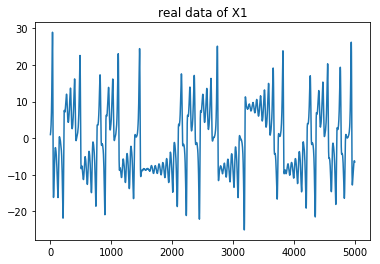

In [101]:
plt.plot(np.arange(X.shape[0]), X[:,1])
plt.title("real data of X1")
plt.show()

#### X2 with NN2

[[ 1.          0.45097296 -0.24887815]
 [ 0.45097296  1.         -0.13686643]
 [-0.24887815 -0.13686643  1.        ]]


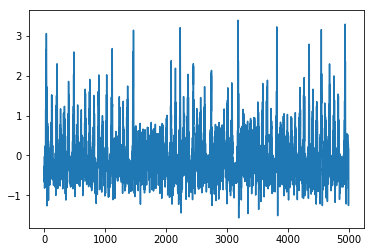

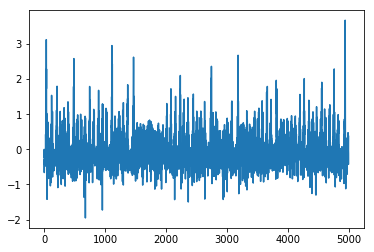

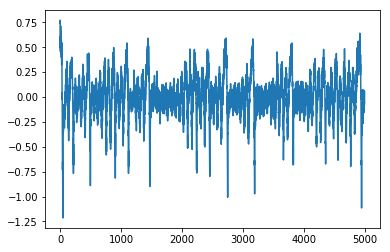

In [102]:
SHAP_Temporal2 = np.empty(X.shape)
M = 10 # iterations per instance

for i in range(X.shape[0]):
    SHAP_Temporal2[i,0] = CalcShap(X,i,0,M,NN2)
    SHAP_Temporal2[i,1] = CalcShap(X,i,1,M,NN2)
    SHAP_Temporal2[i,2] = CalcShap(X,i,2,M,NN2)
print(np.corrcoef(np.transpose(SHAP_Temporal2)))    
    
    
for i in range(X.shape[1]):
    plt.plot(np.arange(X.shape[0]), SHAP_Temporal2[:,i])
    plt.show()

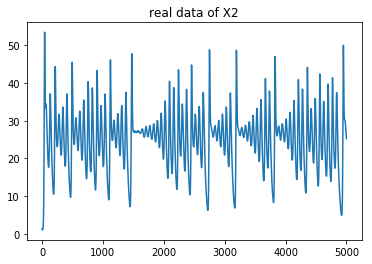

In [103]:
plt.plot(np.arange(X.shape[0]), X[:,2])
plt.title("real data of X2")
plt.show()

## Export Model
Export models NN0, NN1 and NN2 to analyse with SHAP-package. 
Hopefully, SHAP notices some interactions for -x0*x2 in NN1 and x0*x1 in NN2.

In [ ]:
# serialize model to JSON
model_json = NN0.to_json()
with open("NN_Lorenz_dotX0.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights 
NN0.save_weights("NN_Lorenz_dotX0.tf",save_format='tf')

In [ ]:
NN0.predict(np.ones(3).reshape(1,-1))

In [ ]:
# serialize model to JSON
model_json = NN1.to_json()
with open("NN_Lorenz_dotX1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights 
NN1.save_weights("NN_Lorenz_dotX1.tf",save_format='tf')
print(NN1.predict(np.ones(3).reshape(1,-1)))

# serialize model to JSON
model_json = NN2.to_json()
with open("NN_Lorenz_dotX2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights 
NN2.save_weights("NN_Lorenz_dotX2.tf",save_format='tf')
NN2.predict(np.ones(3).reshape(1,-1))